In [79]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import datetime
%matplotlib inline
plt.rcParams['patch.force_edgecolor'] = True
import seaborn as sns
sns.set()
df1 = pd.read_json('ultimate_data_challenge.json')
df = pd.read_json('logins.json')

In [80]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [81]:
df_logins = df.resample("15min", on="login_time").count()
df_logins.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [57]:
#resampling df to 15-minute intervals
df_logins = df.resample("15min", on="login_time").count()
df_logins.index.name = "time"
df_logins.reset_index(inplace=True)
df_logins.rename({"login_time":"logins"}, axis=1, inplace=True)
df_logins.head()

,time,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [58]:
logins = df.set_index('login_time')
logins['logins'] = 1
data = logins.resample('1D').sum()
print('There were {} total logins from {} days.'\
      .format(df_logins.logins.sum(), len(data)))
data.head()

There were 93142 total logins from 103 days.


,logins
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


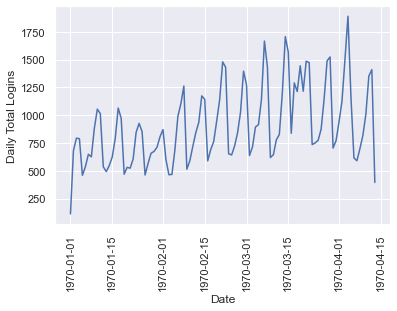

In [59]:
# Plot the daily trend
_ = plt.plot(data)
_ = plt.xticks(rotation=90)
_ = plt.xlabel('Date')
_ = plt.ylabel('Daily Total Logins')

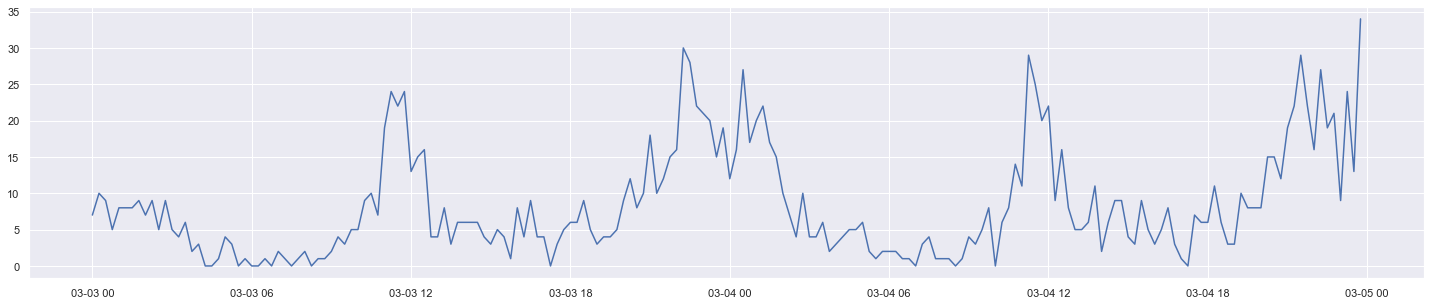

In [60]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.sort_index(inplace=True)
df_agg = df.resample("15min").sum()
plt.figure(figsize=(25,5));
#df_agg.loc['1970-03-03':'1970-03-04' ].plot()
plt.plot(df_agg.loc['1970-03-03':'1970-03-04' ])

we can see that 12pm and 12am are the peaks, as when people at these time might need to be out for lunch or go home at midnights, 6am and 6pm are the lowest as these time people still at home notgoing out or it's dinner time

<AxesSubplot:xlabel='login_time'>

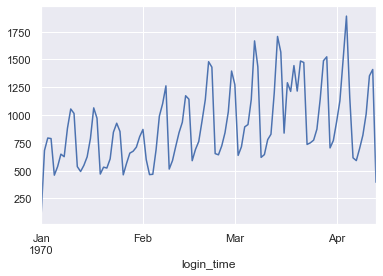

In [61]:
y=data['logins']
y.plot()

The time series looks pretty stationary with little noise

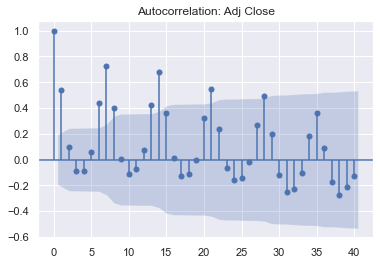

In [62]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
title = 'Autocorrelation: Adj Close'
lags = 40
plot_acf(y,title=title,lags=lags);

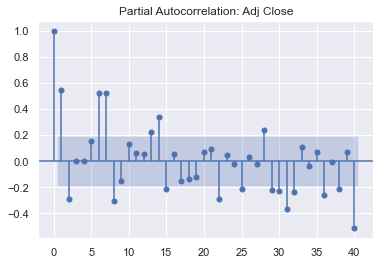

In [63]:
title='Partial Autocorrelation: Adj Close'
lags=40
plot_pacf(y,title=title,lags=lags);

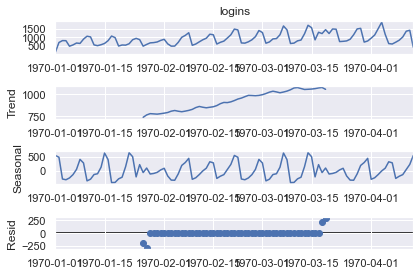

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['logins'], model = 'additive', period = int(len(data)/2))
result.plot();

In [65]:
y_log=np.log(y)

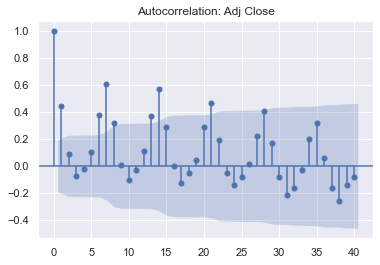

In [66]:
title = 'Autocorrelation: Adj Close'
lags = 40
plot_acf(y_log,title=title,lags=lags);

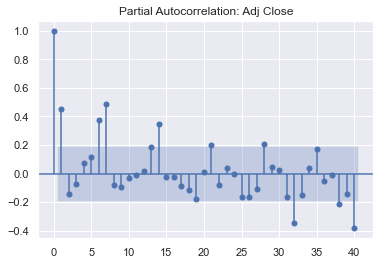

In [67]:
title='Partial Autocorrelation: Adj Close'
lags=40
plot_pacf(y_log,title=title,lags=lags);

<AxesSubplot:xlabel='login_time'>

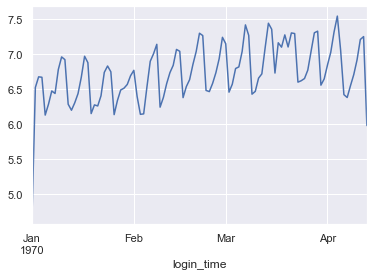

In [68]:
y_log.plot()

In [69]:
y_diff=y_log.diff()
y_diff=y_diff[2:]

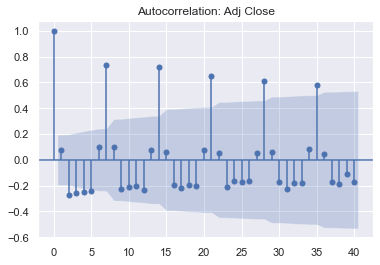

In [70]:
title = 'Autocorrelation: Adj Close'
lags = 40
plot_acf(y_diff,title=title,lags=lags);

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


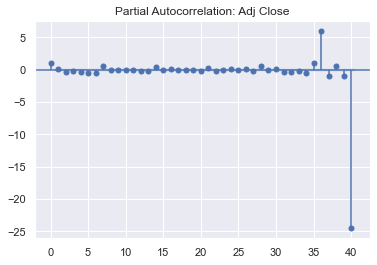

In [71]:
title='Partial Autocorrelation: Adj Close'
lags=40
plot_pacf(y_diff,title=title,lags=lags);

<AxesSubplot:xlabel='login_time'>

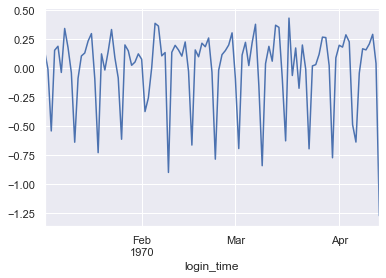

In [72]:
y_diff.plot()

In [73]:
y_ddiff=y_diff.diff()
y_ddiff=y_ddiff[2:]

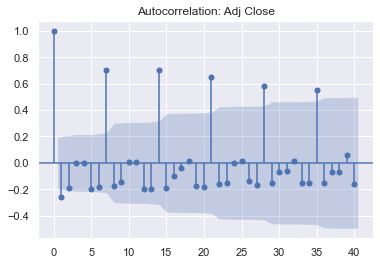

In [74]:
title = 'Autocorrelation: Adj Close'
lags = 40
plot_acf(y_ddiff,title=title,lags=lags);

In [75]:
from statsmodels.tsa.stattools import kpss
kpss(y_ddiff)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.2078581435583442,
 0.1,
 12,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [76]:
from scipy import stats
from scipy.stats import ttest_ind
data['weekend'] = data.index.weekday >=5
t1=stats.ttest_ind(data.loc[data.weekend==True, 'logins'],
                data.loc[data.weekend==False, 'logins'])
t1

Ttest_indResult(statistic=8.46472731224942, pvalue=2.113648536307778e-13)

In [77]:
# Separate weekdays and weekends
weekday = logins.loc[logins.index.weekday<5]
weekend = logins.loc[logins.index.weekday>=5]
# Aggregate by 15-minute intervals
weekday = weekday.resample('15T').sum()
weekend = weekend.resample('15T').sum()
# Get the average of logins per time window
weekday['time'] = weekday.index.time
weekend['time'] = weekend.index.time
weekday = weekday.groupby('time')['logins'].mean()
weekend = weekend.groupby('time')['logins'].mean()

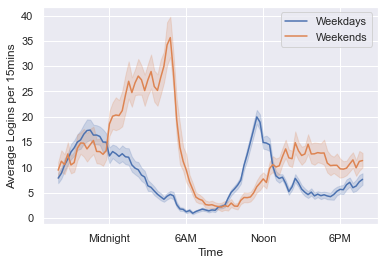

In [82]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
data = logins.resample('15T').sum()
data['time'] = data.index.time
data['time'] = data['time'].astype('str')
data['weekend'] = data.index.weekday>=5
data.head()
_ = sns.lineplot(x='time', y='logins', hue='weekend', data=data)
_ = plt.xticks(['00:00:00','06:00:00','12:00:00','18:00:00'],['Midnight','6AM','Noon','6PM'])
_ = plt.xlabel('Time')
_ = plt.ylabel('Average Logins per 15mins')
_ = plt.legend(['Weekdays', 'Weekends'])

we can see that the peak and lowest are different for weekends and weekdays